In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from w266_common import utils, vocabulary

In [2]:
df = pd.read_csv('./mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df.sort_values("words_per_comment", ascending=False, inplace=True)
df.head()

,type,posts,words_per_comment
2469,ENFP,'So my love language is words of affirmation. ...,37.62
1315,INTJ,'Thank you! I forgot to reply on this. I talk ...,37.22
8005,INFP,'I really like the way you put that. It makes ...,36.98
5221,INFP,'I actually practically live on youtube and ag...,36.94
3962,ESTJ,'Ya I've come to learn that my best friend is ...,36.80


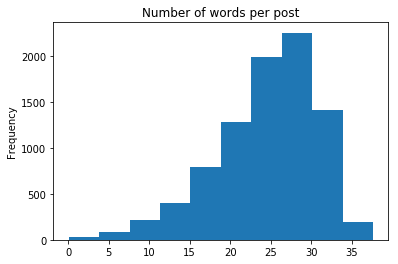

In [4]:
df['words_per_comment'].plot(kind="hist", title="Number of words per post");
plt.show()

      posts  words_per_comment
type                          
INFP   1832               1832
INFJ   1470               1470
INTP   1304               1304
INTJ   1091               1091
ENTP    685                685
ENFP    675                675
ISTP    337                337
ISFP    271                271
ENTJ    231                231
ISTJ    205                205
ENFJ    190                190
ISFJ    166                166
ESTP     89                 89
ESFP     48                 48
ESFJ     42                 42
ESTJ     39                 39


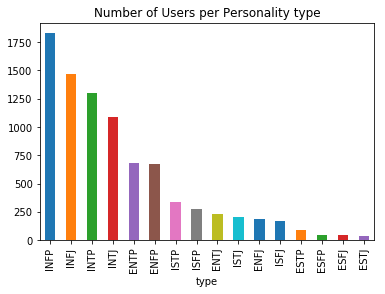

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

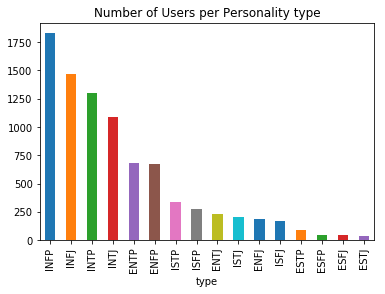

In [6]:
#Personality Types
types = df.groupby("type").count()
types.sort_values("posts", ascending=False, inplace=True)
print(types)
types["posts"].plot(kind="bar", title="Number of Users per Personality type");
plt.show(types)

In [ ]:
# function to tokenize and clean sentence ["Hello world."] into list of words ["hello","world"]
def clean_tokenize(sentence):
    ignore_words = ['a']
    words = re.sub("[^\w]", " ",  sentence).split() #nltk.word_tokenize(sentence)
    words_cleaned = [w.lower() for w in words if w not in ignore_words]
    return words_cleaned

In [ ]:
# split posts per users into separate sentences
post = []
utype = []
user = []

for index, row in df.iterrows():
    posts = row['posts'].split('|||')
    posts_clean = []
    for sentence in posts:
        posts_clean.append(clean_tokenize(sentence))
    post.extend(posts_clean)
    utype.extend([row['type'] for i in range(len(posts))])
    user.extend([index for i in range(len(posts))])
    
short_posts = pd.DataFrame({"user": user,"type": utype,"post": post})
print(short_posts.shape)
short_posts.head()

In [ ]:
# Build a vocabulary:
V = 30000
vocab_mbti = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in utils.flatten(short_posts['post'])), size=V)

In [ ]:
# Canonicalize sentences and create input data
input_mbti = []
for i, row in short_posts.iterrows():
    input_mbti.append(utils.preprocess_sentences(row['post'], vocab=vocab_mbti))
input_mbti[0]

In [ ]:
# Create true label data
y_label_mbti16 = np.array(short_posts["type"])
y_label_mbti16[0:5]

In [ ]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import json, os, re, shutil, sys, time
from importlib import reload
import collections, itertools

# NumPy and TensorFlow
import numpy as np
import pandas as pd
import tensorflow as tf
assert(tf.__version__.startswith("1."))

# Utils and Helper libraries
# import nltk
from w266_common import utils, vocabulary
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import MBTI2x4_LSTM_model as model
import MBTI_data_setup as ds

In [ ]:
#load data
df = pd.read_csv('./mbti_1.csv')
df.head(5)

reload(ds)
post, mbti_type, user = ds.splitPosts(df)

# Split data: 80% train, 20% test
post_train, post_test, label_train, label_test = train_test_split(post, mbti_type, test_size=0, random_state=8)

In [ ]:
sample_sentences = post_train[:100]
sample_mbti_label = label_train[:100]

with open('sample_sentences.txt', 'w') as f:
    for item in sample_sentences:
        f.write("%s\n" % item)

with open('sample_mbti_label.txt', 'w') as f:
    for item in sample_mbti_label:
        f.write("%s\n" % item)
    

In [ ]:
for label in sample_mbti_label[:30]:
    print(list(label))

In [ ]:
linh = ["intj",
"esfj",
"istj",
"estj",
"infp",
"intp",
"infp",
"esfj",
"infp",
"istj",
"istj",
"isfj",
"esfj",
"infp",
"infj",
"entj",
"intp",
"istj",
"isfj",
"enfp",
"infp",
"estj",
"entp",
"esfj",
"infj",
"esfp",
"istj",
"entj",
"enfp",
"esfj",
"esfp",
"enfj",
"enfj",
"estp",
"intp",
"istj",
"infp",
"estp",
"estj",
"estp",
"infp",
"intp",
"intj",
"estj",
"entp",
"isfj",
"intp",
"intj",
"estj",
"infp",
"intp",
"esfj",
"infp"]

for label in linh[:30]:
    print(list(label))

In [ ]:
heather = ["INTJ",
"ESTJ",
"INFP",
"ENTJ",
"ISFJ",
"INFJ",
"ESTJ",
"ISFJ",
"ESFP",
"INTP",
"ESTP",
"ESTJ",
"INTJ",
"ISFJ",
"ISTJ",
"ENTJ",
"ESFJ",
"ESTP",
"ISFJ",
"ESTP",
"ESTJ",
"ENTJ",
"ENTP",
"ESFJ",
"INFP",
"ESFP",
"INFJ",
"ENFJ",
"ENFP",
"ESFJ",
"esfp",
"enfj",
"enfj",
"estp",
"intp",
"istj",
"infp",
"estp",
"estj",
"estp",
"infp",
"intp",
"intj",
"estj",
"entp",
"isfj",
"intp",
"intj",
"estj",
"infp",
"intp",
"esfj",
"infp"]

for label in heather:
    print(list(label))